In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 23_03_2022 07_34_00.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 16_03_2022 07_33_42.xlsx')

In [5]:
filtrado = dados[['Competencia Evolucao','Houve internacao','Classificacao final','Evolucao']]
filtrado = filtrado.dropna()
filtrado.head()

,Competencia Evolucao,Houve internacao,Classificacao final,Evolucao
0,2020_01,Sim,SRAG não especificado,Cura
1,2020_01,Sim,SRAG não especificado,Cura
2,2020_01,Sim,SRAG não especificado,Cura
3,2020_02,Sim,SRAG não especificado,Cura
4,2020_03,Sim,SRAG não especificado,Cura


In [6]:
numerador = filtrado.loc[filtrado['Evolucao']=='Óbito']
numerador = numerador.loc[numerador['Classificacao final']=='COVID-19']
numerador = numerador.loc[numerador['Houve internacao']=='Sim']
numerador = numerador.groupby('Competencia Evolucao').count()
#numerador = numerador.drop('2020_02')
numerador

,Houve internacao,Classificacao final,Evolucao
Competencia Evolucao,,,
2020_03,4,4,4
2020_04,58,58,58
2020_05,174,174,174
2020_06,420,420,420
2020_07,1321,1321,1321
2020_08,1531,1531,1531
2020_09,1238,1238,1238
2020_10,976,976,976
2020_11,1137,1137,1137


In [7]:
denominador = filtrado
denominador['Evolucao'] = denominador['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'}) #Vai substituir onde esta Óbito ou Cura por Óbito/Cura, para dps podermos pegar so as linhas que interessam
denominador = denominador.loc[denominador['Evolucao']=='Óbito/Cura']
denominador = denominador.loc[denominador['Houve internacao']=='Sim']
denominador = denominador.loc[denominador['Classificacao final']=='COVID-19']
denominador = denominador.groupby('Competencia Evolucao').count()
#denominador = denominador.drop('2022_02')
denominador

,Houve internacao,Classificacao final,Evolucao
Competencia Evolucao,,,
2020_03,37,37,37
2020_04,418,418,418
2020_05,970,970,970
2020_06,1681,1681,1681
2020_07,4013,4013,4013
2020_08,5007,5007,5007
2020_09,4271,4271,4271
2020_10,3495,3495,3495
2020_11,4215,4215,4215


In [8]:
calculo = numerador['Evolucao']/denominador['Evolucao']*100
calculo = calculo.to_frame()
calculo = calculo.reset_index()
calculo

,Competencia Evolucao,Evolucao
0,2020_03,10.810811
1,2020_04,13.875598
2,2020_05,17.938144
3,2020_06,24.985128
4,2020_07,32.918016
5,2020_08,30.577192
6,2020_09,28.986186
7,2020_10,27.925608
8,2020_11,26.975089
9,2020_12,31.517328


In [9]:
semana = calculo['Competencia Evolucao']
semana

0     2020_03
1     2020_04
2     2020_05
3     2020_06
4     2020_07
5     2020_08
6     2020_09
7     2020_10
8     2020_11
9     2020_12
10    2021_01
11    2021_02
12    2021_03
13    2021_04
14    2021_05
15    2021_06
16    2021_07
17    2021_08
18    2021_09
19    2021_10
20    2021_11
21    2021_12
22    2022_01
23    2022_02
24    2022_03
Name: Competencia Evolucao, dtype: object

In [10]:
eixo_y = calculo['Evolucao']

In [11]:
legenda = pd.DataFrame(columns={'Em hospitalizações'})

In [12]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 23_3_2022'

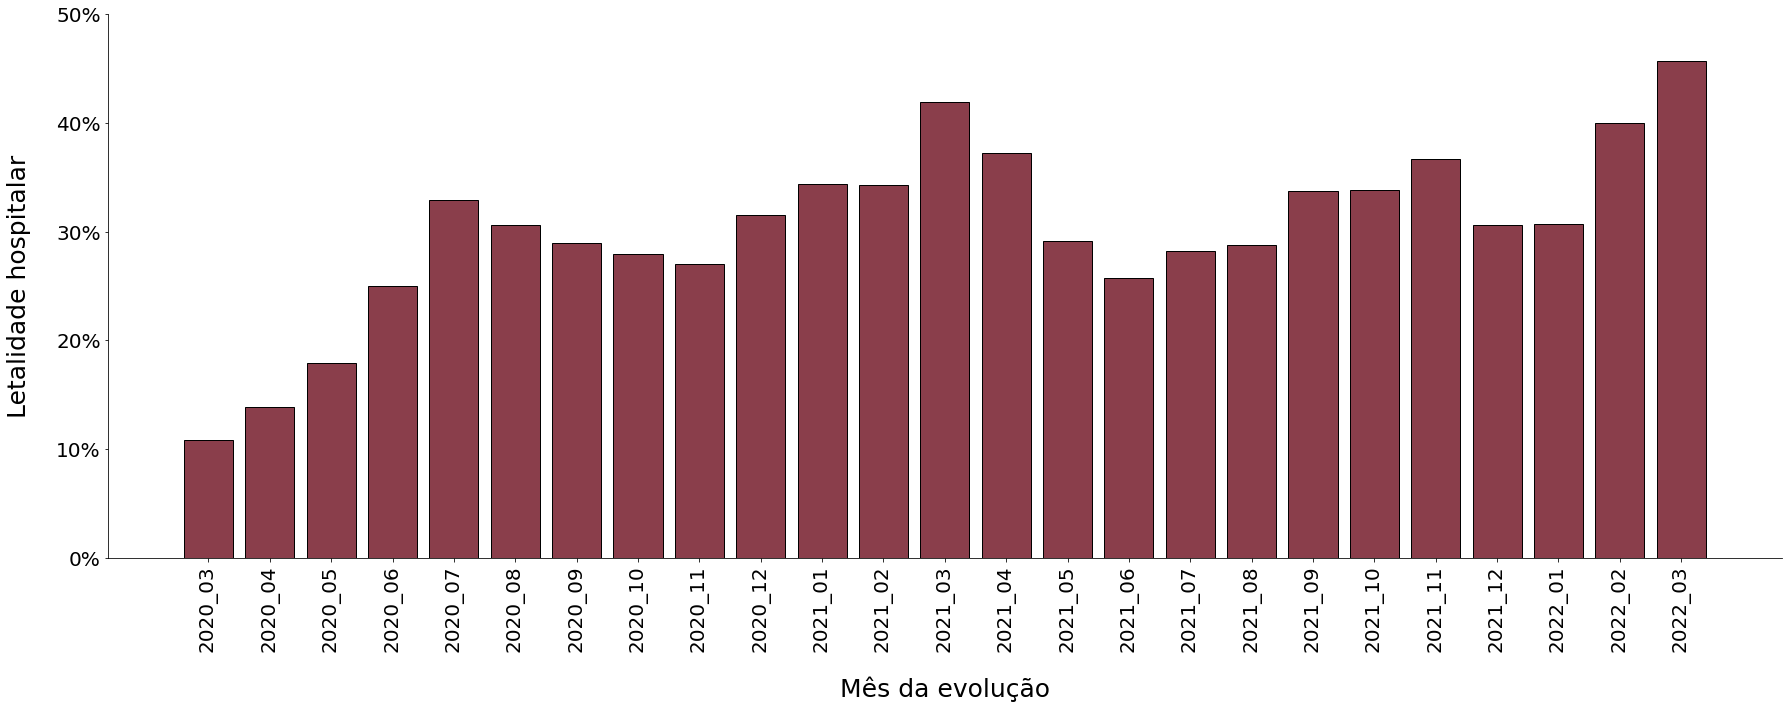

In [13]:
plt.figure(figsize=(30,10))
plt.bar(semana,eixo_y,color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=20)
plt.yticks(np.arange(0,60,10),fontsize=20)
plt.xlabel('Mês da evolução',fontsize=25,labelpad=25)
plt.ylabel('Letalidade hospitalar',fontsize=25,labelpad=25)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide8.png',dpi=720,bbox_inches='tight')